In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("data/adult.data", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### No missing values present in the data

In [7]:
df.shape

(32561, 15)

In [8]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [9]:
df.duplicated().sum()

24

In [10]:
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [11]:
df['income'].value_counts(normalize=True)

income
 <=50K    0.75919
 >50K     0.24081
Name: proportion, dtype: float64

In [15]:
income = df['income'].value_counts()
income.values, income.index

(array([24720,  7841], dtype=int64),
 Index([' <=50K', ' >50K'], dtype='object', name='income'))

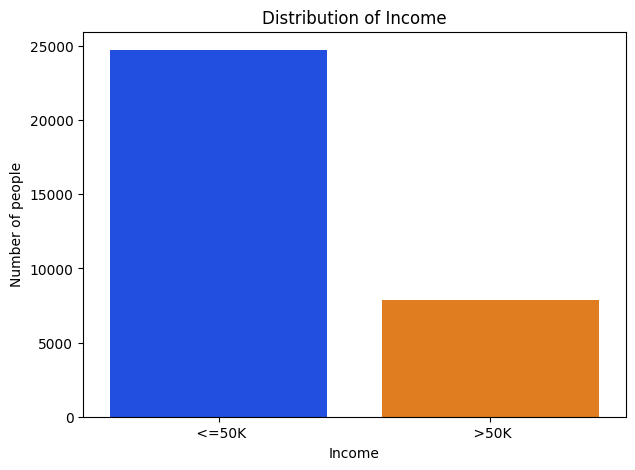

In [23]:
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

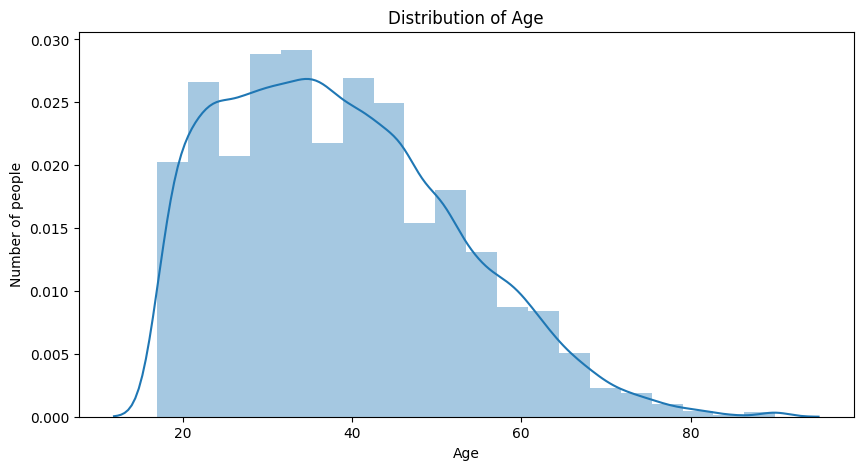

In [26]:
age = df['age'].value_counts()
plt.figure(figsize=(10, 5))
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

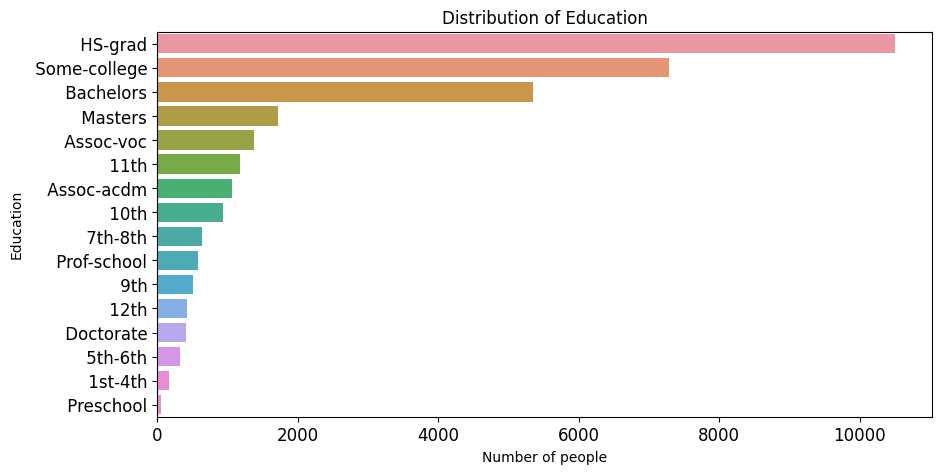

In [27]:
edu = df['education'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index)
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.tick_params(labelsize=12)
plt.show()

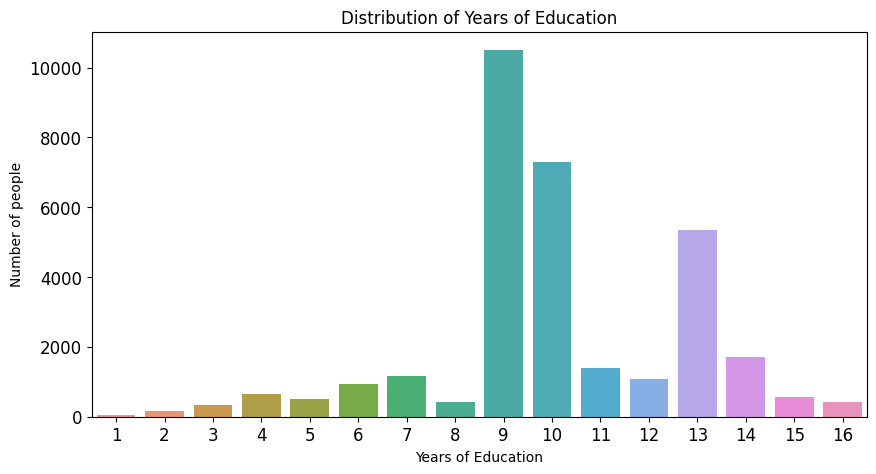

In [28]:
edu_num = df['education_num'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

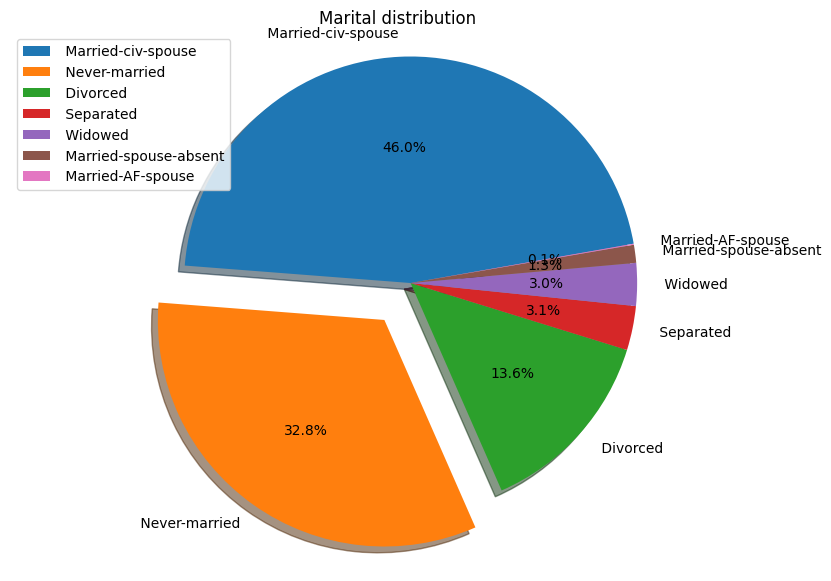

In [29]:
marital = df['marital_status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, explode=(
    0, 0.20, 0, 0, 0, 0, 0), startangle=10,shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

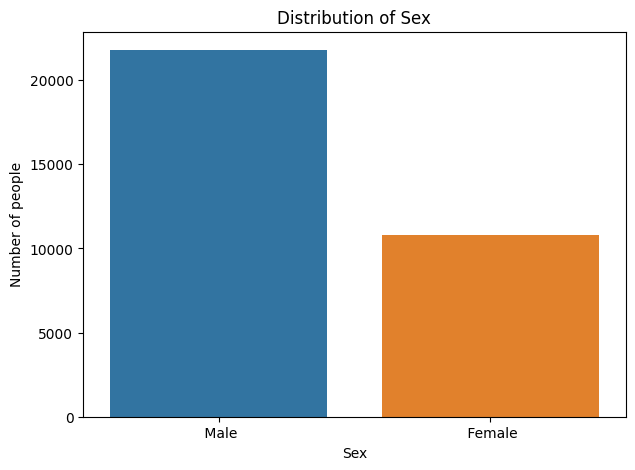

In [31]:
sex = df['sex'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

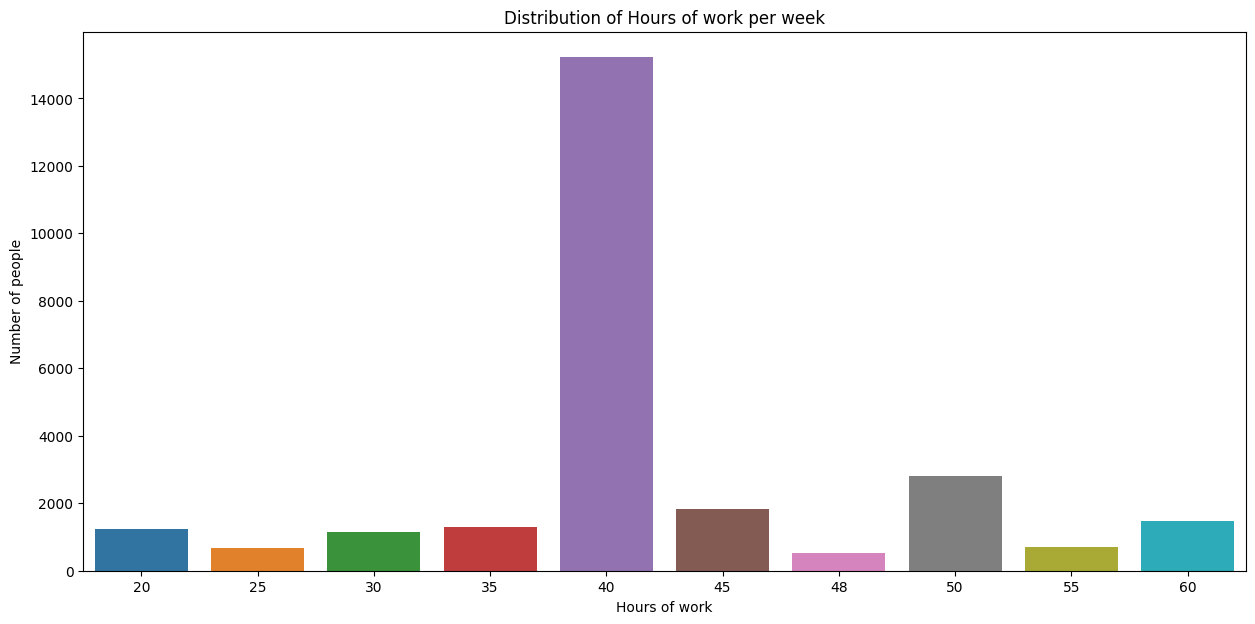

In [32]:
hours = df['hours_per_week'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values)
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.show()

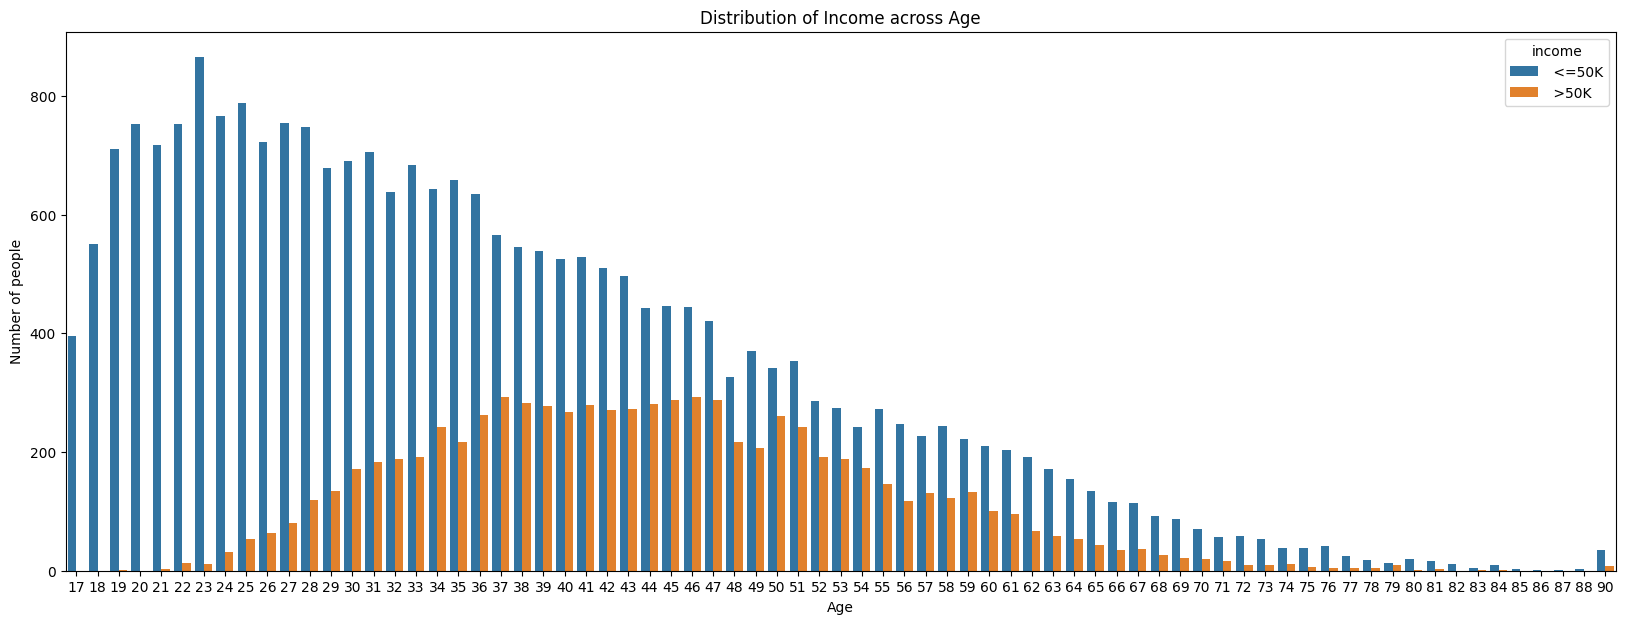

In [35]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

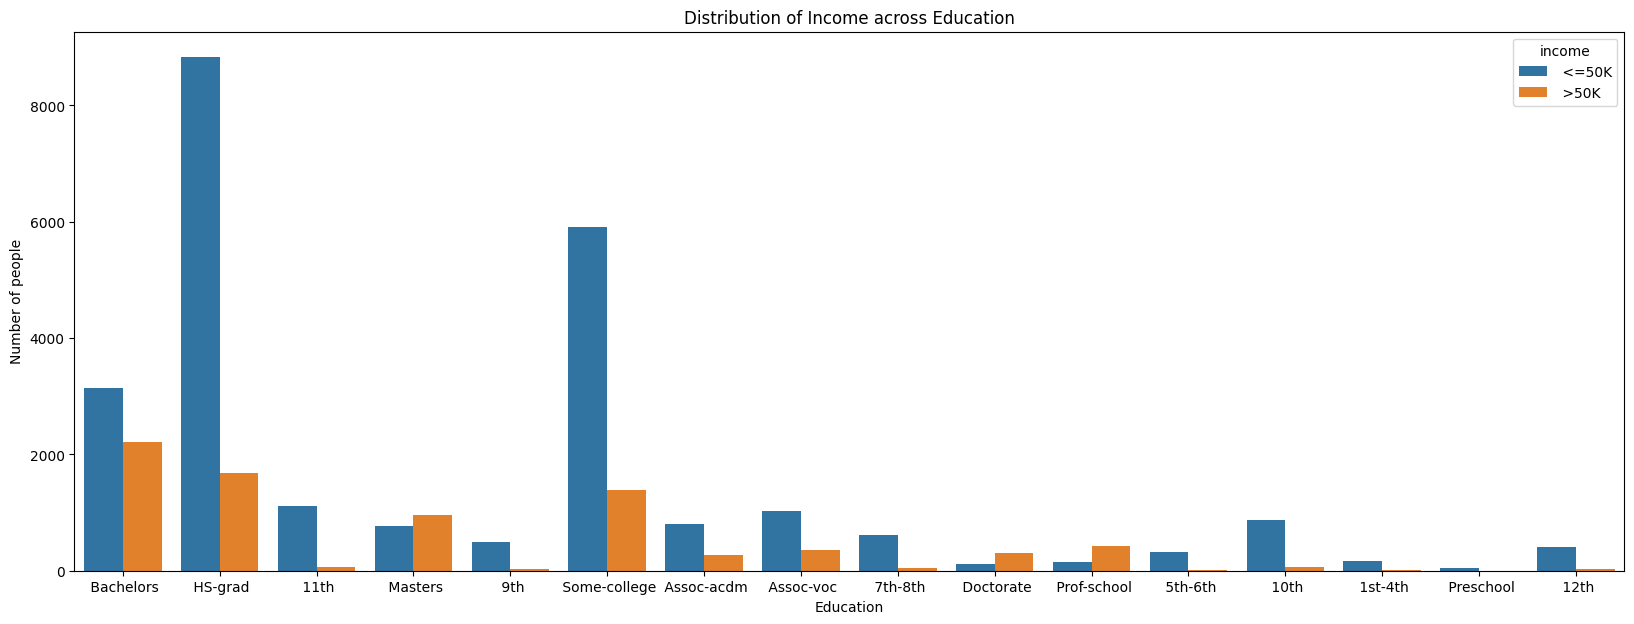

In [36]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'], hue=df['income'])
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

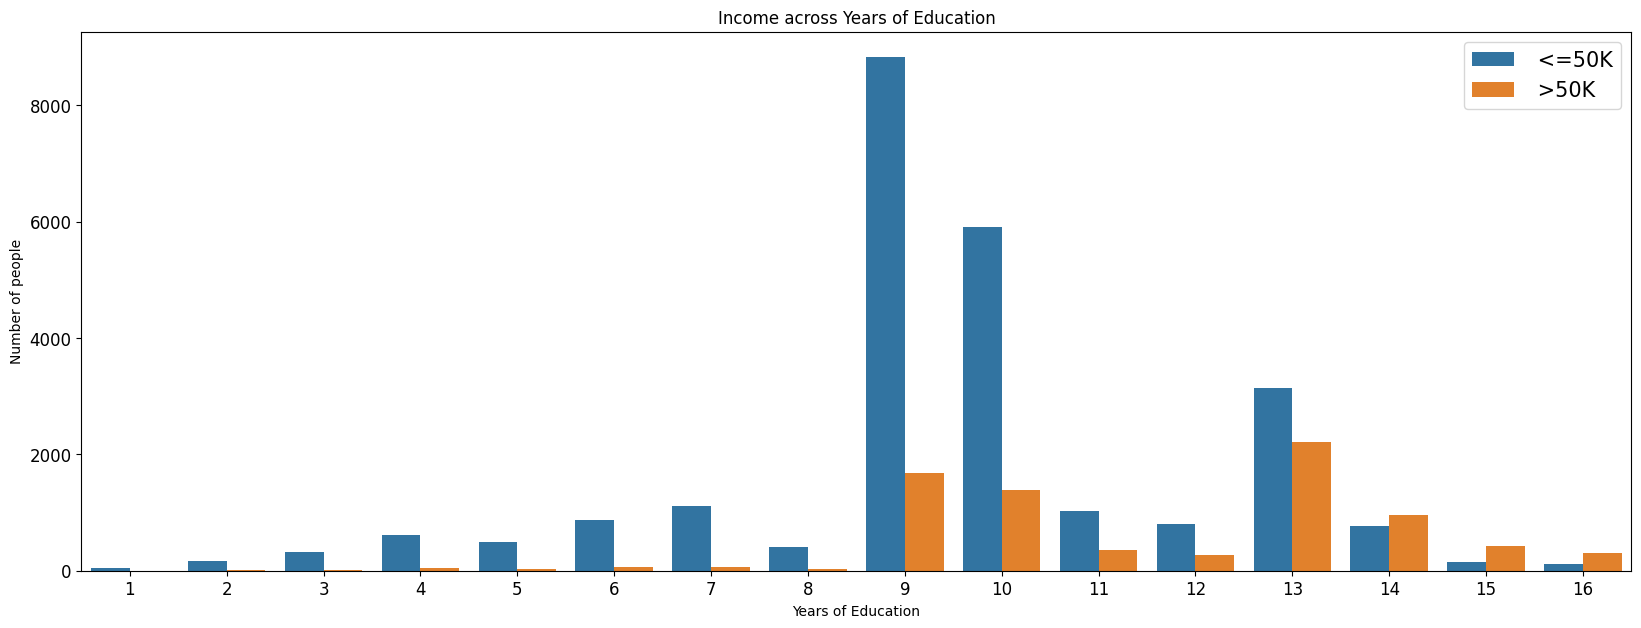

In [37]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education_num'],hue=df['income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 15})

plt.show()

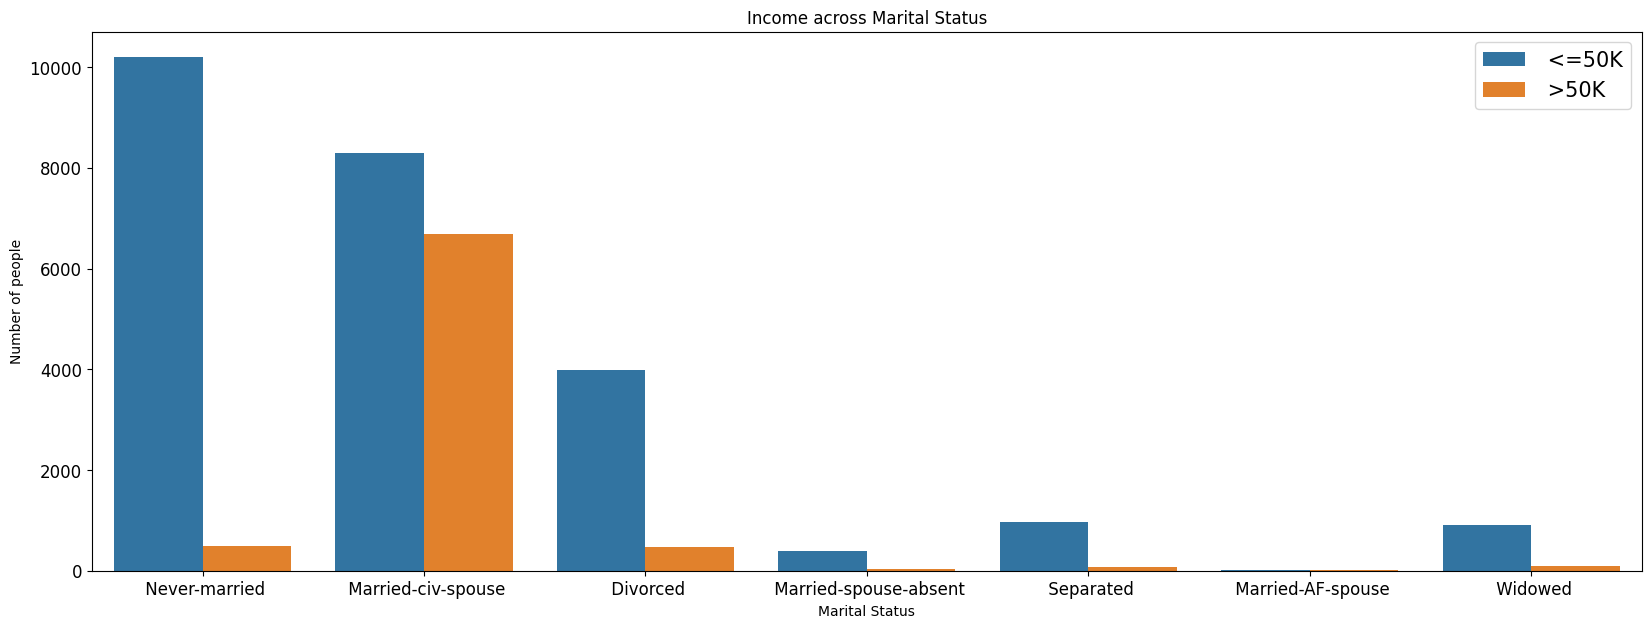

In [38]:

plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 15})
plt.show()

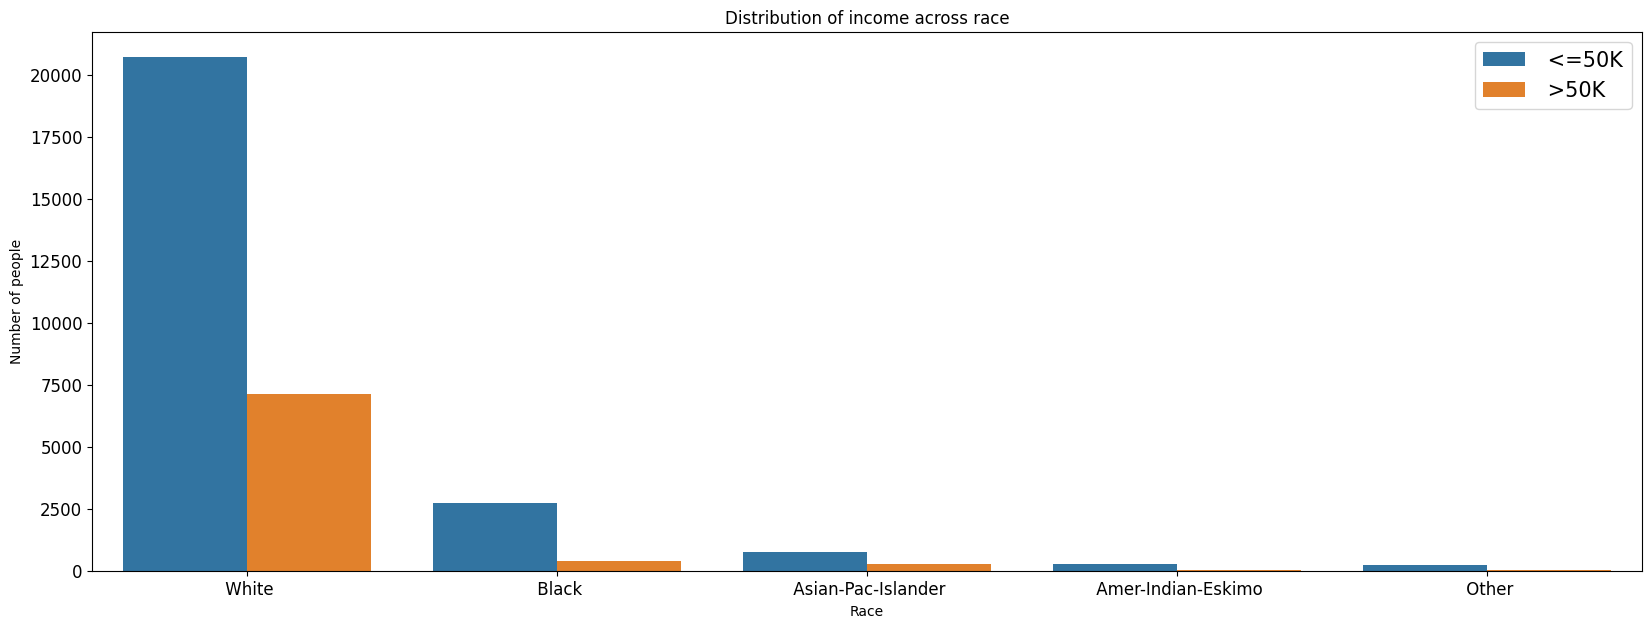

In [39]:

plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 15})
plt.show()

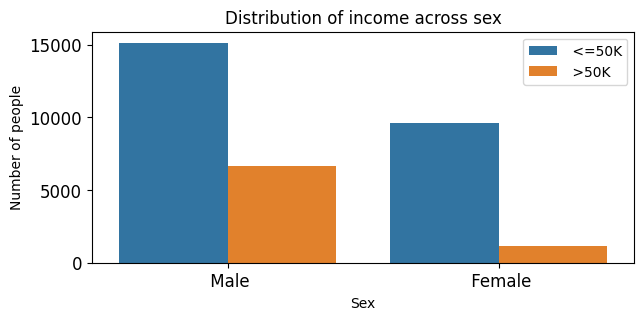

In [40]:
plt.figure(figsize=(7, 3))
sns.countplot(x=df['sex'], hue=df['income'])
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 10})
plt.show()

<Figure size 1000x500 with 0 Axes>

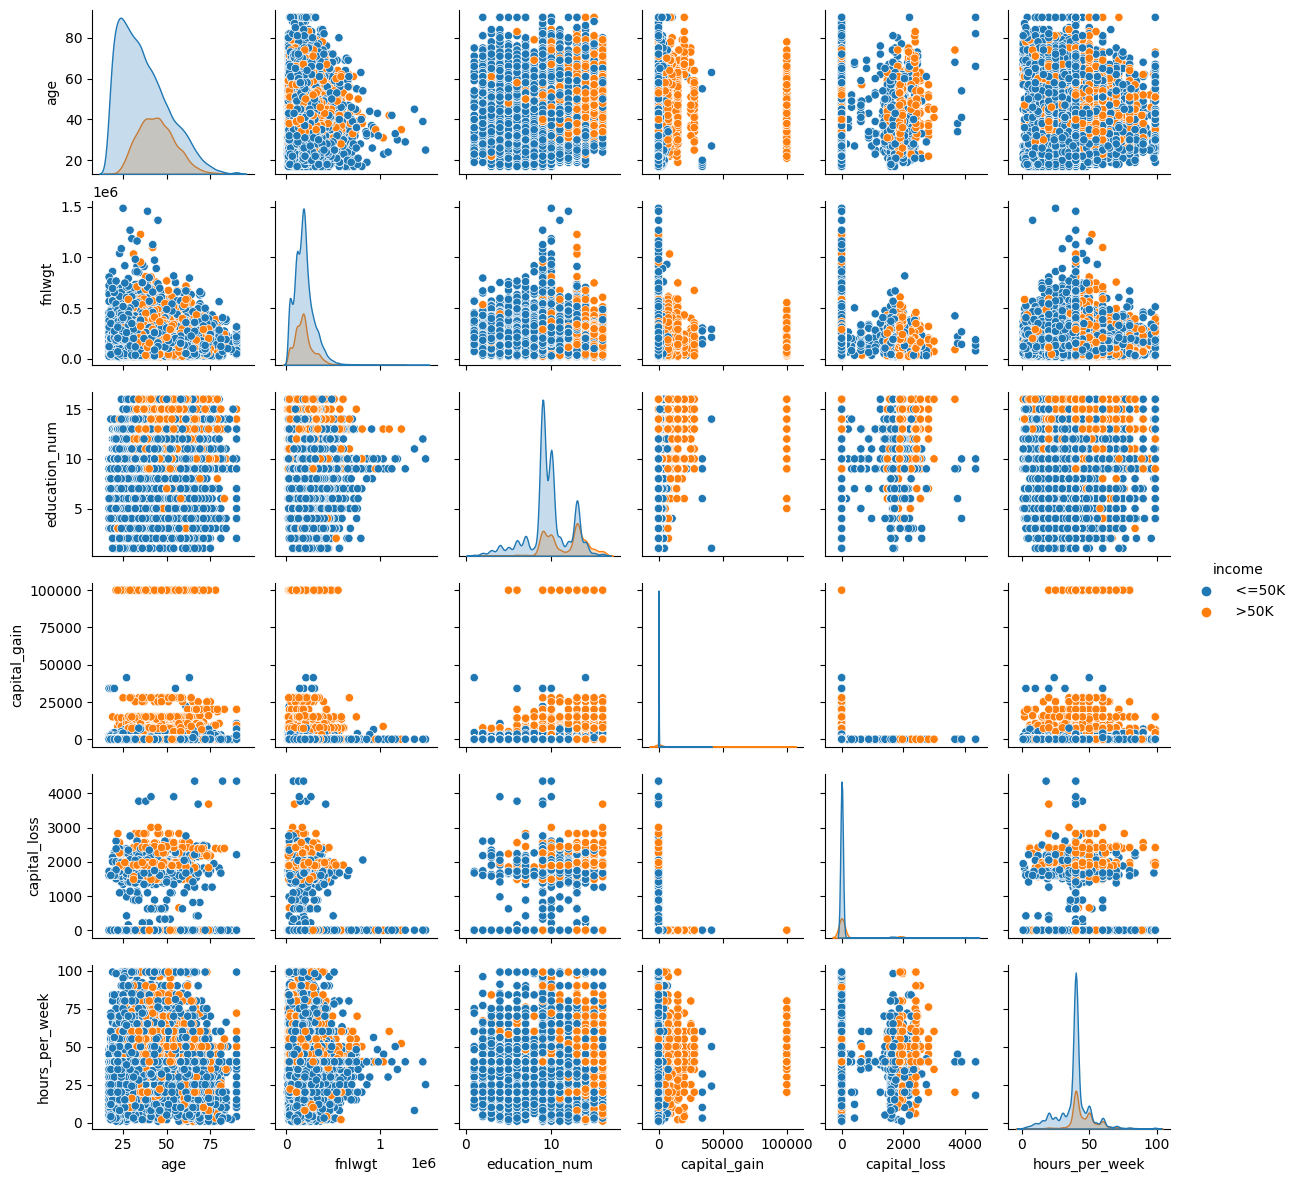

In [41]:
fig = plt.figure(figsize=(10,5))
sns.pairplot(df, hue='income', height=2)
plt.show()